# PC IV - Atomic Simulation Environment (ASE[$^{[1]}$](https://doi.org/10.1088/1361-648X/aa680e))
In this course we wil have a look at the python library *Atomic Simulation Environment* ([ASE](https:wiki.fysik.dtu.dk/ase/)) ).

ASE has different *interfaces*  for quantum chemical (QM) und molecular dynamic (MD) codes (Asap, Gaussian, GROMACS, NWChem, Psi4, Turbomole, and many more). 

Requirements: Introduction course *Python für Chemiker* (Chapter 1: Introduction to Python 3.6 - Dr. Anders S. Christensen ).

How to pass: Report the results from Exercise 1 to the exercise homepage.


To receive the necessary files used in this exercise, please contact me: stefanniklaus.heinen@unibas.ch




## Table of Contents

*   Installation
*   Introduction
 *  H$_2$ using Gaussian09
 *  H$_2$ using ASE
 * Distance Scan of H$_2$
*   Reading/Writing Molecules
*   Using Optimization Algorithms
*   Exercise - Nudge Elastic Band (NEB) Calculations

---

I'm using the dark theme in google colabs, if you don't, please change 
```
color='w'
```
to
```
color='k'
```
whenever using matplotlib.

## (0) Installation

In [0]:
!pip install ASE

     |████████████████████████████████| 2.1MB 2.8MB/s 


In [0]:
!pip install pyscf

     |████████████████████████████████| 24.3MB 174kB/s 


After the installation we need to add the [PySCF](https://sunqm.github.io/pyscf/) calculator to ASE.
On the panel on the left click on the folder symbol and go to *usr/local/lib/python3.6/dist-packeges/ase/calculators*.
Then right click on *calculators* and make a new file, name it *pyscf_simple.py* and open it (double click on it).
Then copy paste the calculator from [Github](https://github.com/heini-phys-chem/ASE_calculators/blob/master/calculators/pyscf_simple.py) and save the file ctrl+s.

Also upload the three xyz files: react.xyz, prod.xyz, and mol.xyz to the *content* directory (you will find the content directory by clicking on the folder symbol as well).

Upload the two figures rxn.png and ASE.png to the content directory

## (1) Introduction
Each QM code has its own notation and it has to be addapted for every code. ASE is a project that should ease the use of differnt codes and optimizers. Instead of writing different input files and starting the calculation using the command line of a terminal, ASE provides everything within a python script.




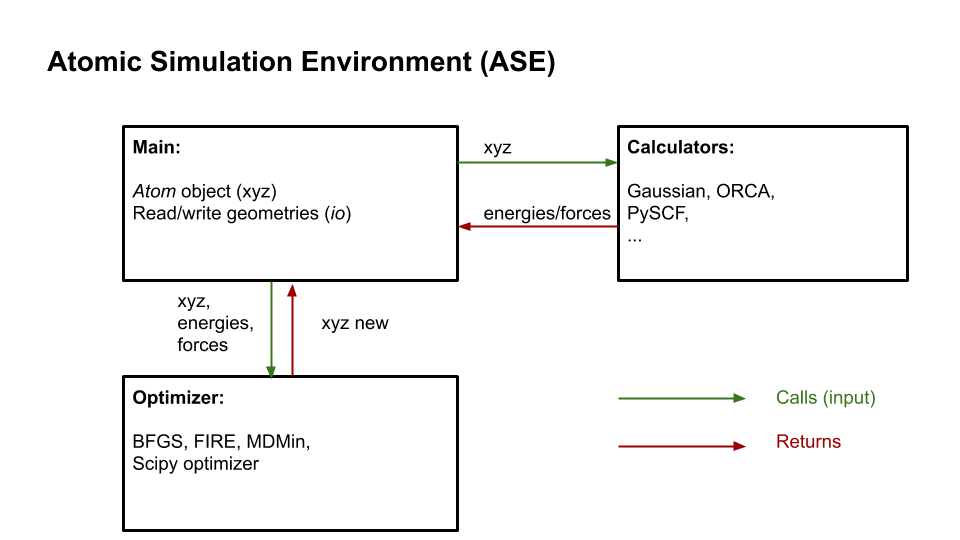

In [0]:
from IPython.display import Image
Image('ASE.png')

The figure above describes how ASE works. The *main* body contains the geometry you read in and calls a *Calculator/Optimizer*. If you want to do a Single Point calculation (SP) the *Calculator* is called and returns energies and forces.

If you want to do a geometry optimization (GO), for every step the *Calculator* is called which returns forces and energies that are forwarded to the *Optimizer*, which changes the geometry and returns the new geometry which is then forwarded to the *Calculator*. This iteration will continue until the convergence criteria of the *Optimizer* is fullfilled.

### H$_2$ using [Gaussian09](https://gaussian.com/glossary/g09/)
The input file (H2.com) in Gaussian looks as follows:
```
# HF 6-31g(d) SP

Title

0 1
H 0.0 0.0 0.0
H 0.0 0.0 0.7
```
The calculation is started using the command line of a terminal:
```
g09 H2.com
```
As an output one gets a text file (H2.log) with hundreds of lines, stating multiple information (input data, meta data, and results). For every calculation one has to extract the needed information, e.g. the energy.

### H$_2$ using ASE
In this simple example we are using ASE to do the same task. The python script sets the parameter, runs the calculation and also prints the required property (the energy) to the standard output.

Unfortunately we cannot use most of the QM codes in Google colabs. The following example will not run, it is just for presenting purposes. For the rest of the course I wrote a simple PySCF calculator (makes not a lot of sense to use PySCF in ASE, as it already contains a python overlayer but for the sake of this course, we will use PySCF to get QM data, like energies and forces).

In [0]:
'''
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
This code block will not run and is just for presenting purposes!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
'''

from ase import Atoms
from ase.calculators.gaussian import Gaussian

# Define the geometry
h2 = Atoms('H2', positions=[[0, 0, 0], [0, 0, 0.7]])

# Set the calculator
h2.set_calculator(Gaussian('HF', '6-31G(d)'))

# Calculate the energy and print it to the standard output
energy = h2.get_potential_energy()
print("Energy of H2 molecule: {}".format(energy))

To run the same calculation with another code (e.g. ORCA or PySCF) only few changes has to be made. Below is an example using PySCF.

In [0]:
from ase import Atoms
from ase.calculators.pyscf_simple import PySCF_simple

# Define the geometry
h2 = Atoms('H2', positions=[[0, 0, 0], [0, 0, 0.7]])

# Set the calculator
h2.set_calculator(PySCF_simple(h2, method='HF', basis='def2svp'))

# Calculate the energy and print it to the standard output
energy = h2.get_potential_energy()
print("Energy of H2 molecule: {:0.3f} eV".format(energy))

Energy of H2 molecule: -30.672 eV


In [0]:
# Now it's your turn. try different basis sets, levels of theory or another molecule and compare your results (supported methods HF, DFT, MP2)

### Distance scan of H$_2$
In this example we'll do a distance scan of the H$_2$ molecule, save the results (energies) into a list and plot the potential energy curve using the library matplotlib.




In [0]:
from ase import Atoms
from ase.calculators.pyscf_simple import PySCF_simple
import matplotlib.pyplot as plt

# define lists
Z2      = [ i*0.1 for i in range(3,50) ]
results = []
results2 = []

# for loop over all distances
for z2 in Z2:
  h2 = Atoms('H2', positions=[[0, 0, 0], [0, 0, z2]])
  h2.set_calculator(PySCF_simple(h2, method='HF', basis='def2svp'))
  energy = h2.get_potential_energy()

  # append result to list
  results.append(energy)

# Convert energies from eV to kcal/mol (pythony way of a for loop)
energies = [ result*23.06 for result in results ]

print("Calculations done")

Calculations done


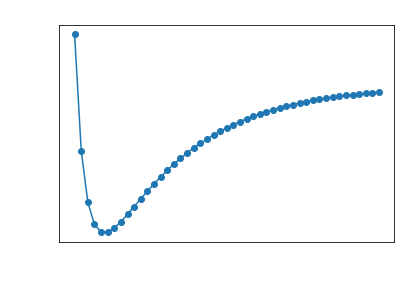

In [0]:
# plot energies vs. distances
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(Z2, energies, 'o-')

ax.set_title(r'H$_2$ distance scan', color='w')
ax.set_xlabel(r'$d$ [$\mathrm{\AA}$]', color='w')
ax.set_ylabel(r'$E$ [kcal/mol]', color='w')

ax.tick_params(axis='both', colors='w')

plt.show()

With a standard QM code one would have to generate 47 input files (one for every bond distance) and later extract the energies of every *log* file.

In [0]:
# Now it's your turn. Try different basis sets and plot it to the same figure to see the effect of a basis set (supported methods HF, DFT, MP2)

## (2) Reading/Writing molecules
With ASE we can read in xyz files using the *io* class.


In [0]:
from ase import io
from ase.atoms import Atoms

# Read in mgeometry from an xzy file
mol = io.read('mol.xyz')

# Print atom coordinates
positions = mol.get_positions()

print("Coordinates:")
for i, position in enumerate(positions):
  print("Atom {}: {}".format(i, position))

# Get atom labels
labels = mol.get_chemical_symbols()

print("\nLabels:")
for i, label in enumerate(labels):
  print("Atom {}: {}".format(i, label))

# write geometry to an xyz file
io.write("mol_new.xyz", mol)

Coordinates:
Atom 0: [0. 0. 0.]
Atom 1: [1.2 0.  0. ]

Labels:
Atom 0: H
Atom 1: H


## (3) Using optimization algorithms
For every QM code supported, ASE has a calculator. This is basically a python overlayer (a link) between ASE and the QM code. In this course you don't need to know how these look like or write one of your own. We will only apply them.

The calculator object is not the code itself and you need the QM code installed on your system to be able to use the calculator.

PySCF, as the name already indicates, is alradeady written with a python overlayer. I wrote a simple PySCF calculator so we can use it in ASE as well.

PySCF, as well as other QM codes, have their own optimizers but this way we can use the optimzers in ASE and PySCF as the QM code in one script.


In [0]:
from ase import io
from ase.calculators.pyscf_simple import PySCF_simple
from ase.atoms import Atoms
from ase.optimize.lbfgs import LBFGS

def print_coords(positions):
  positions = mol.get_positions()

  print("\nCoordinates:")
  for i, position in enumerate(positions):
    print("Atom {}: {}".format(i, position))

In [0]:
# Read in geometry
mol = io.read('mol.xyz')
positions = mol.get_positions()
print_coords(positions)

# Set the calculator
mol.set_calculator(PySCF_simple(mol, method='DFT', xc='PBE', basis='def2svp'))

# Add an optimizer (LBFGS)
lbfgs = LBFGS(mol)

# Run the geometry optimization (fmax is the convergence criteria for the force)
print("\nStarting optimization (fmax=0.05)\n")
lbfgs.run(fmax=0.05)

positions = mol.get_positions()
print_coords(positions)



Coordinates:
Atom 0: [0. 0. 0.]
Atom 1: [1.2 0.  0. ]

Starting optimization (fmax=0.05)

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 07:34:32      -30.096187*       4.6241
LBFGS:    1 07:34:34      -30.465774*       4.5524
LBFGS:    2 07:34:35      -30.822890*       4.2834
LBFGS:    3 07:34:37      -31.147890*       3.7101
LBFGS:    4 07:34:39      -31.410545*       2.6693
LBFGS:    5 07:34:41      -31.564313*       0.9052
LBFGS:    6 07:34:42      -31.578725*       0.4082
LBFGS:    7 07:34:44      -31.580057*       0.0364

Coordinates:
Atom 0: [ 2.14146875e-01  8.57885170e-18 -1.79483753e-17]
Atom 1: [ 9.85853125e-01 -6.18175441e-18 -8.97371607e-18]


The optimal bond length of H$_2$ lies around 0.7 Angstrom which was achieved after the optimization. 

In [0]:
# Now it's your turn. Try different basis sets and/or levels of theory, optimize the hydrogen molecule again and compare the bond lengths (supported methods HF, DFT, MP2)

## Exercise 1 - Nudge elastic band (NEB) calculation
The NEB method is used to find a transition state path between a reactant (initial state) and a product (final state). NEB creates a *chain* of images (geometries) and then relaxes them towards the transition state path or IRC (intrinsic reaction coordinate).

For this exercise you are using the NEB [tutorial](https://wiki.fysik.dtu.dk/ase/ase/neb.html) (shown below) on the ASE homepage to fill in your code in the code blocks below.

```
# NEB tutorial from https://wiki.fysik.dtu.dk/ase/ase/neb.html

from ase import io
from ase.neb import NEB
from ase.optimize import MDMin

# Read initial and final states:
initial = io.read('A.traj')
final = io.read('B.traj')

# Make a band consisting of 5 images:
images = [initial]
images += [initial.copy() for i in range(3)]
images += [final]
neb = NEB(images)

# Interpolate linearly the potisions of the three middle images:
neb.interpolate()

# Set calculators:
for image in images[1:4]:
    image.set_calculator(MyCalculator(...))

# Optimize:
optimizer = MDMin(neb, trajectory='A2B.traj')
optimizer.run(fmax=0.04)
```

Use the examples from this course to run a NEB calculation of a Hydrogen shift. Please report the final *fmax* of the optimization of the reactant and product as well as the activation barrier ($E_\mathrm{a}$) and the reaction energy ($E_{\mathrm{r}}$) in **kcal/mol** (ASE returns energies in **eV**) on the exercise homepage.







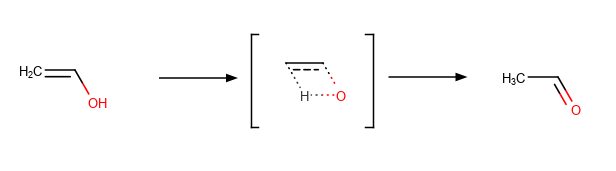

In [0]:
from IPython.display import Image
Image('rxn.png')

In [0]:
from ase import io
from ase.neb import NEB
from ase.neb import NEBTools
from ase.calculators.pyscf_simple import PySCF_simple
from ase.atoms import Atoms
from ase.optimize.lbfgs import LBFGS
from ase.optimize import FIRE

import numpy as np

import matplotlib.pyplot as plt

In [0]:
# Read initial and final states:
print(" -> read xyz")
initial = io.read('react.xyz')
final   = io.read('prod.xyz')

initial.set_calculator(??)
final.set_calculator(??)

 -> read xyz


In [0]:
# Optimnize reactant
??

 -> opt react prod
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 06:54:52    -4106.169083*       5.1627
LBFGS:    1 06:54:54    -4106.425816*       2.6415
LBFGS:    2 06:54:57    -4106.544334*       1.7765
LBFGS:    3 06:54:59    -4106.610015*       0.8720
LBFGS:    4 06:55:01    -4106.636910*       0.6563
LBFGS:    5 06:55:03    -4106.645183*       0.3634
LBFGS:    6 06:55:05    -4106.649956*       0.1884


True

In [0]:
 # optimize product
??

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 06:55:11    -4107.329225*       2.5364
LBFGS:    1 06:55:13    -4107.382598*       3.0094
LBFGS:    2 06:55:16    -4107.400776*       2.0277
LBFGS:    3 06:55:18    -4107.434591*       0.7063
LBFGS:    4 06:55:20    -4107.441538*       0.3772
LBFGS:    5 06:55:22    -4107.446525*       0.2978
LBFGS:    6 06:55:25    -4107.448409*       0.1195


True

In [0]:
# Make a band consisting of N=7 images:
images	= [initial]
images += [??]
images += [final]

In [0]:
# Set calculators for all images using a for loop
print(" -> set calculator")
??

 -> set calculator


In [0]:
# Set up NEB
neb = NEB(images, climb=True, k=0.6)
nebTools = NEBTools(images)
neb.interpolate('idpp')

In [0]:
# Chose optimizer for the NEB run (here FIRE)
??

 -> start neb run


---


> THE NEB CALCULATION WILL TAKE APPROX. 20 MIN!



---

In [0]:
# Run NEB
opt.run(fmax=0.2)

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 06:55:54    -4100.300426*       8.8532
FIRE:    1 06:56:15    -4100.629680*       6.7216
FIRE:    2 06:56:36    -4100.723277*       5.1939
FIRE:    3 06:56:57    -4100.815571*       4.2697
FIRE:    4 06:57:18    -4100.927779*       6.3080
FIRE:    5 06:57:39    -4100.988391*       3.7775
FIRE:    6 06:57:59    -4101.110622*       3.1879
FIRE:    7 06:58:21    -4101.301850*       3.0599
FIRE:    8 06:58:42    -4101.551889*       3.5242
FIRE:    9 06:59:02    -4101.818378*       3.1857
FIRE:   10 06:59:23    -4102.046740*       2.8585
FIRE:   11 06:59:44    -4102.208522*       2.2524
FIRE:   12 07:00:05    -4102.327933*       3.0394
FIRE:   13 07:00:25    -4102.400592*       2.8750
FIRE:   14 07:00:46    -4102.398702*       2.9335
FIRE:   15 07:01:06    -4102.398874*       3.3796
FIRE:   16 07:01:27    -4102.420085*       3.1977
FIRE:   17 07:01:47    -4102.456595*       2.8510
FI

True

In [0]:
# get NEB data
Ea, dE = nebTools.get_barrier() # barriers
x, y, x_fit, y_fit, forces = nebTools.get_fit() # points along the IRC
Er = np.abs(y[0] - y[-1])

print("Ea = {:0.3f}".format(Ea * ??))
print("Er = {:0.3f}".format(Er * ??))

Ea = 91.659
Er = 18.412


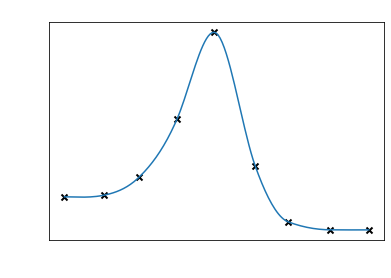

In [0]:
# plot the IRC
import matplotlib.pyplot as plt

# convert energies from eV to kcal/mol
y     *= 23.06
y_fit *= 23.06

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_fit, y_fit, color='C0', label='PBE (PySCF)')
ax.scatter(x, y, marker='x', color='k', lw=2)

ax.set_xlabel("IRC", color='w')
ax.set_ylabel("Energy [kcal/mol]", color='w')
ax.set_title(r"PySCF", color='w')

ax.tick_params(axis='both', colors='w', color='w')

plt.show()

fig.savefig("IRC.png")